In [1]:
# imports for data analysis
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import the data
mta = pd.read_csv("./data/MTA_Subway_Customer_Metrics_2020-2024.csv")

In [5]:
# view the first lines of data
mta.head(10)

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685
5,2024-12-01,A DIVISION,3,peak,2867204.8,0.959497,0.428210,2751075.0,1227766.2,305835.66,0.106667,0.893333
6,2024-12-01,A DIVISION,4,offpeak,4061860.5,0.936306,0.360165,3803145.2,1462940.0,541052.40,0.133203,0.866797
7,2024-12-01,A DIVISION,4,peak,4294458.0,0.932414,0.369444,4004213.5,1586562.2,524842.25,0.122214,0.877786
8,2024-12-01,A DIVISION,5,offpeak,2769309.5,1.218507,0.621453,3374423.0,1720994.5,398652.22,0.143954,0.856046
9,2024-12-01,A DIVISION,5,peak,3658115.2,1.073862,0.325576,3928312.0,1190993.6,463947.56,0.126827,0.873173


In [6]:
# get descriptive information about the data set
mta.describe()

,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
count,2.856000e+03,2856.000000,2856.000000,2.856000e+03,2.856000e+03,2.856000e+03,2856.000000,2856.000000
mean,2.188061e+06,1.251518,0.276823,2.903727e+06,9.339990e+05,3.404776e+05,0.145785,0.854215
std,1.450171e+06,0.454368,0.482434,2.065435e+06,1.258208e+06,2.435442e+05,0.059847,0.059847
min,3.017300e+03,-0.431496,-2.213688,-7.396448e+03,-3.060992e+06,4.630000e+01,0.000112,0.682048
25%,1.091265e+06,0.962920,0.024190,1.284948e+06,5.169300e+03,1.451870e+05,0.107274,0.808143
50%,2.049147e+06,1.223633,0.339261,2.804886e+06,6.263841e+05,3.103827e+05,0.146694,0.853306
75%,3.184311e+06,1.540595,0.598394,4.261219e+06,1.605923e+06,5.129739e+05,0.191857,0.892726
max,8.923406e+06,3.506892,1.584780,1.462646e+07,7.841808e+06,1.274929e+06,0.317952,0.999888


In [7]:
# get information about the data
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   month                              2856 non-null   object 
 1   division                           2856 non-null   object 
 2   line                               2856 non-null   object 
 3   period                             2856 non-null   object 
 4   num_passengers                     2856 non-null   float64
 5   additional platform time           2856 non-null   float64
 6   additional train time              2856 non-null   float64
 7   total_apt                          2856 non-null   float64
 8   total_att                          2856 non-null   float64
 9   over_five_mins                     2856 non-null   float64
 10  over_five_mins_perc                2856 non-null   float64
 11  customer journey time performance  2856 non-null   float

In [8]:
# check for null values
mta.isnull().sum()

month                                0
division                             0
line                                 0
period                               0
num_passengers                       0
additional platform time             0
additional train time                0
total_apt                            0
total_att                            0
over_five_mins                       0
over_five_mins_perc                  0
customer journey time performance    0
dtype: int64

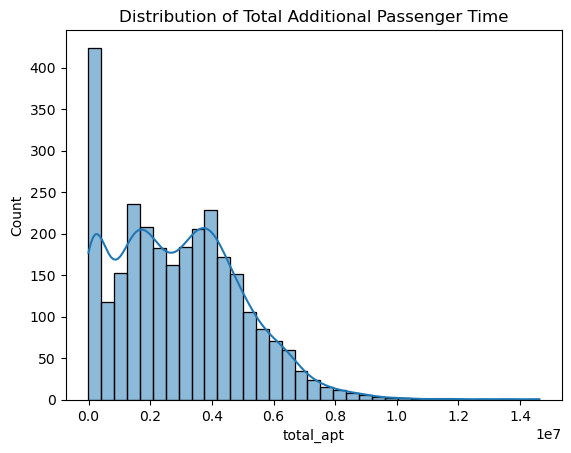

In [ ]:
# Distribution of train arrival wait times
sns.histplot(mta['total_apt'], kde=True)
plt.title('Distribution of Total Additional Passenger Time')
plt.show()

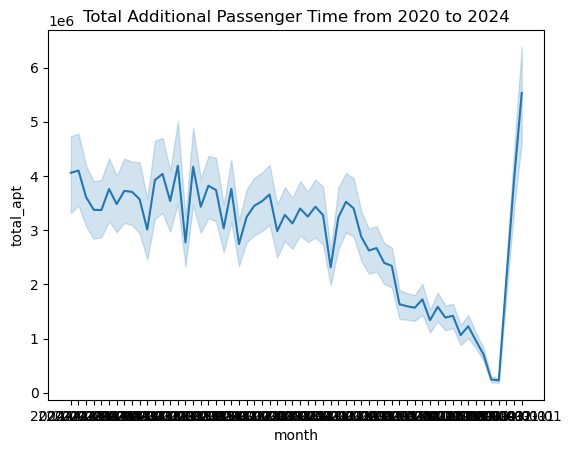

In [12]:
# Train arrival wait times over the months
sns.lineplot(data=mta, x="month", y="total_apt")
plt.title("Total Additional Passenger Time from 2020 to 2024")
plt.show()

<Figure size 1600x600 with 0 Axes>

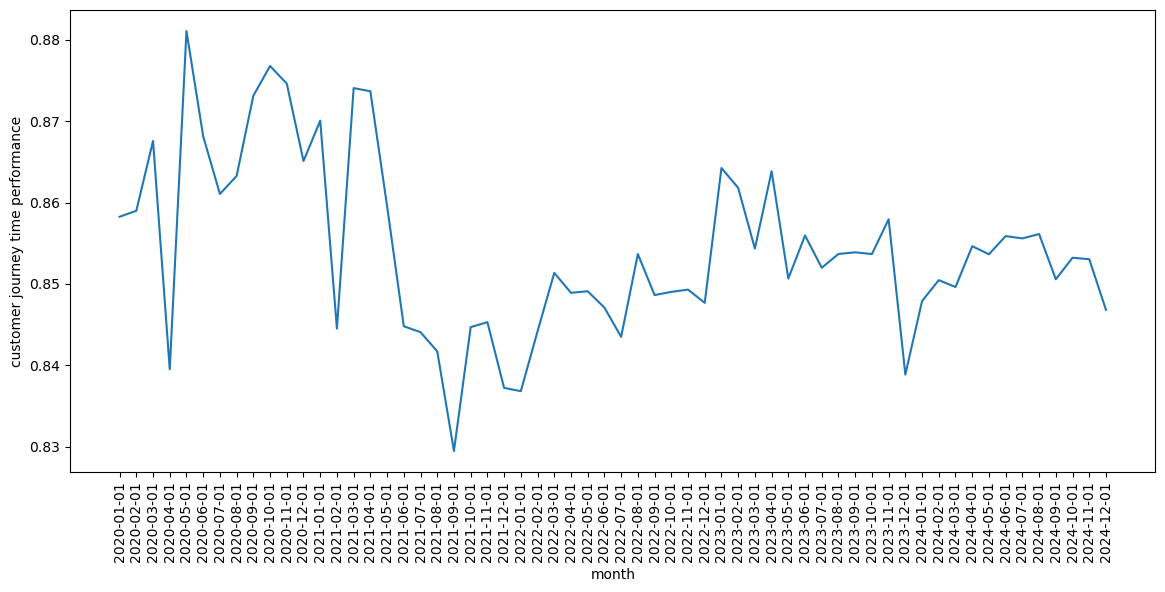

In [27]:
import matplotlib.dates as mdates

plt.figure(figsize=(16, 6))
mta_monthly = mta.groupby('month').mean(numeric_only=True).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='month', y='customer journey time performance', data=mta_monthly)
plt.xticks(rotation=90)
plt.show()